# Candidate Screening and Ranking with NLP+ ML Algorithms

# **Importing the Basic Libraries**
1.Seaborn is a library that uses Matplotlib underneath to plot graphs. **It will be used to visualize random distributions.**

2.**Pyplot is an API (Application Programming Interface)** for Python’s matplotlib that effectively makes matplotlib a viable open source alternative to MATLAB. Matplotlib is a library for data visualization, typically in the form of plots, graphs and charts.

In [ ]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#program to display warning a message
import warnings
# displaying the warning message
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# Understanding Dataset

In [ ]:
#The DataFrame. shape attribute in Pandas enables us to obtain the shape of a DataFrame.
df.shape

(962, 2)

In [ ]:
# prints information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
#Replace all values in the DataFrame with True(1) for NULL values, otherwise False(0):
df.isnull().sum()

,0
Category,0
Resume,0


In [ ]:
#It used to find the unique values from a Category Column.
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
#The nunique() function counts the number of unique entries in a column of a dataframe.
df['Category'].nunique()

25

**Value_counts() function return a Series containing counts of unique values.** The **resulting object will be in descending order** so that the first element is the most frequently-occurring element. Excludes NA values by default.

**The reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes.**

In [ ]:
categories = df['Category'].value_counts().reset_index()
categories

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


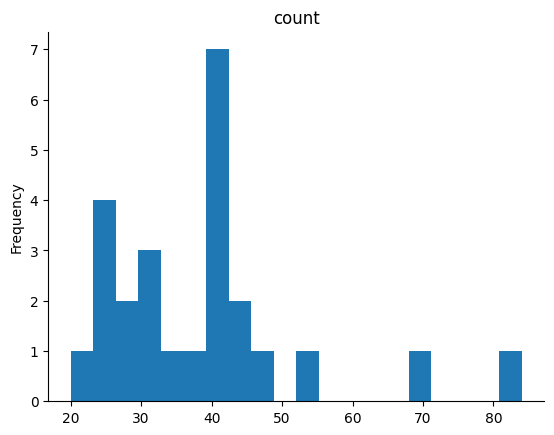

In [ ]:
from matplotlib import pyplot as plt
categories['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Seaborn is an amazing visualization library** for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. I

**seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.**

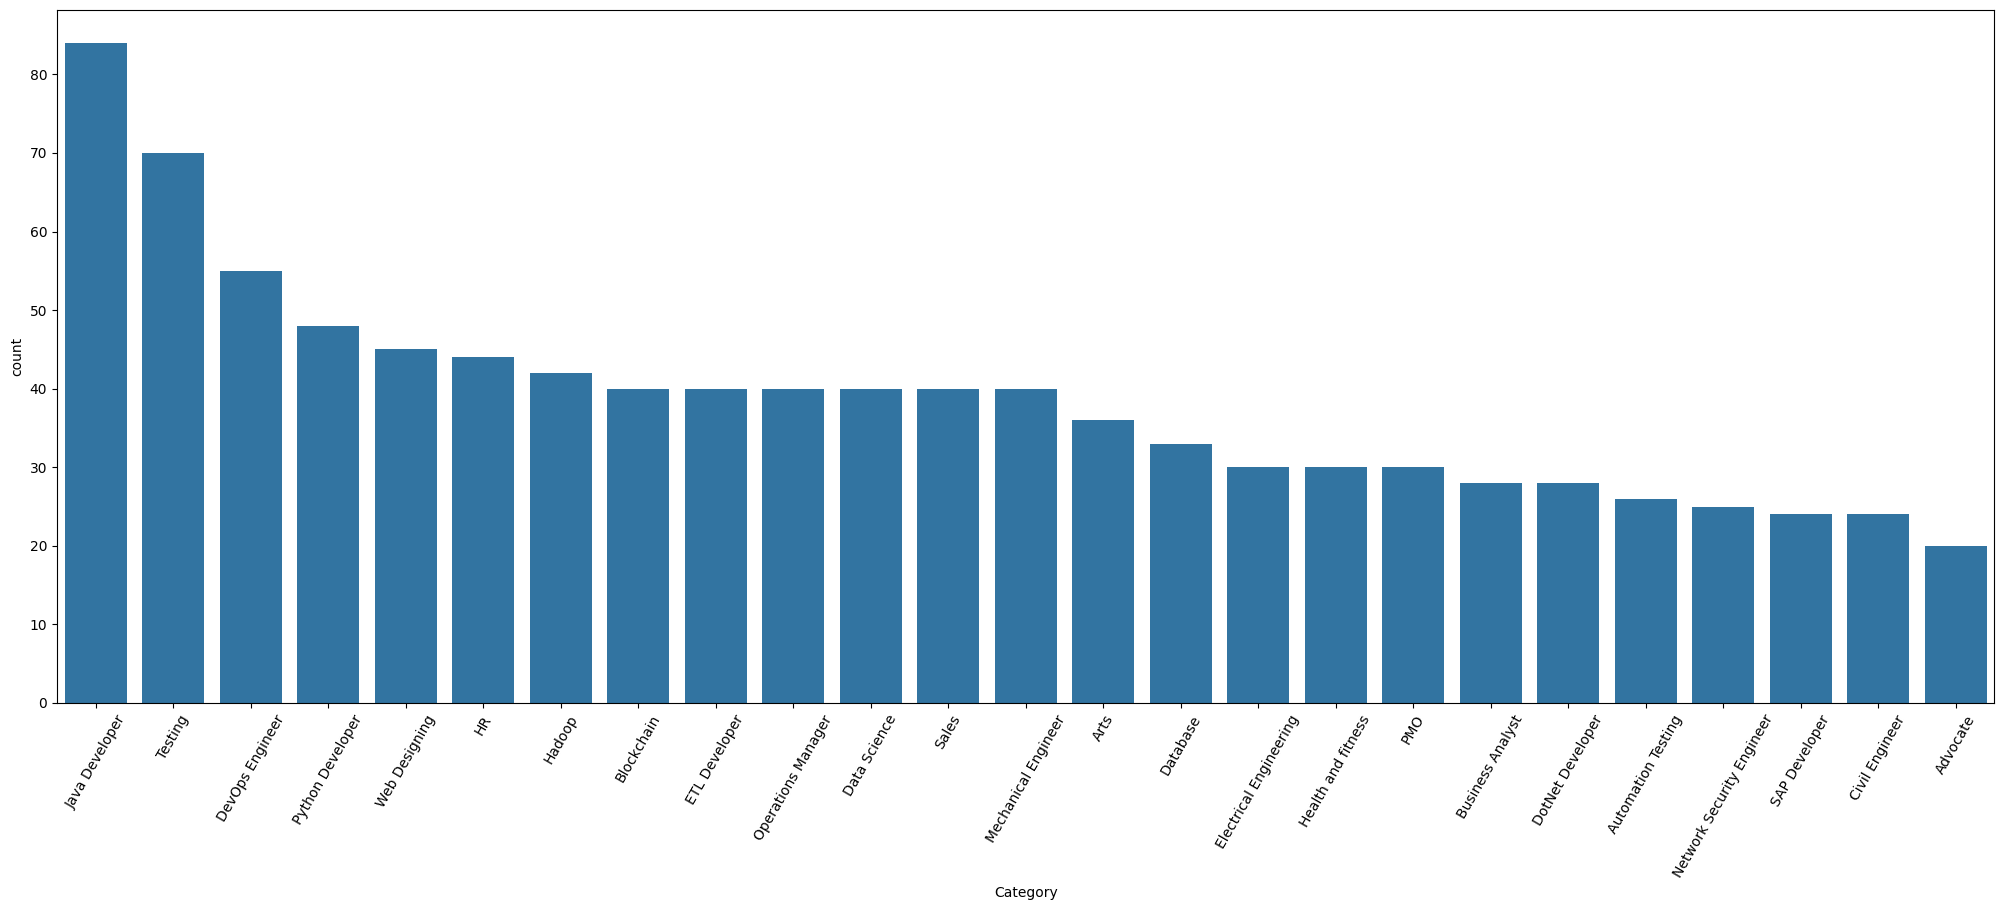

In [ ]:
plt.figure(figsize=(25,9))
#xticks() function is used to get or set the current tick locations and labels of the x-axis.
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)

# Show the plot
plt.show()

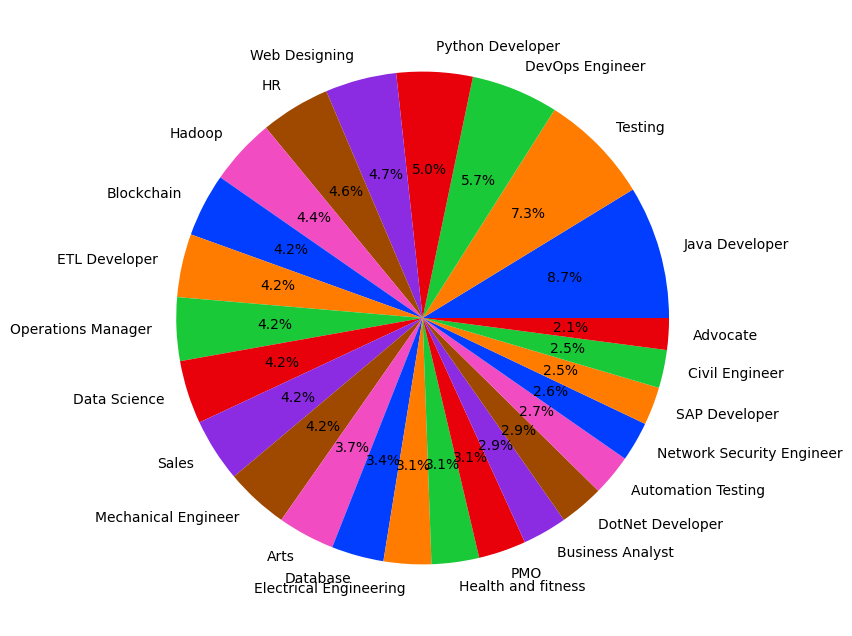

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame
categories = df['Category'].value_counts().reset_index()

# Rename the columns for clarity
categories.columns = ['Category', 'Count']

# Plotting the pie chart
plt.figure(figsize=(25,8))

# Define Seaborn color palette to use
colors = sns.color_palette('bright')[0:7]

# Create pie chart
plt.pie(categories['Count'], labels=categories['Category'], colors=colors, autopct='%.1f%%')

# Show the plot
plt.show()


# Preprocessing Data

Let's create a helper function to remove URLs, hashtags, mentions, special letters and punctuation

Firstly, Let's add a new column for this:

In [ ]:
#The copy() method returns a copy of the DataFrame.
df1= df.copy()
df1['cleaned_resume']= ""
df1

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


Function:
**A regular expression (or RE)** specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).

**re.sub() returns a string where all matching occurrences of the specified pattern are replaced by the replace string.**

In [ ]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

Let's apply to columns:
Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series. It comes as a huge improvement for the pandas library as this function  **helps to segregate data according to the conditions required** due to which it is efficiently used in data science and machine learning.

In [ ]:
df1['cleaned_resume'] = df1['Resume'].apply(lambda x: clean_function(x))
df1.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Let's encode the Category column:

**Label Encoding in Python can be achieved using Sklearn Library. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
df2= df1.copy()
df2['Category']= LabelEncoder().fit_transform(df2['Category'])
df2.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Let's create wordcloud:

**1.NLTK (Natural Language Toolkit)**  is the go-to API for NLP (Natural Language Processing) with Python. **It is a really powerful tool to preprocess text data for further analysis like with ML models for instance. It helps convert text into numbers, which the model can then easily work with.**

**2.In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.**

**3.A wordcloud is a technique to show which words are the most frequent in the given text.**

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Stop words are generally the most common words in a language.
#English stop words from nltk:
SetOfStopWords= set(stopwords.words('english')+['``',"''"])

In [ ]:
totalWords= []


In [ ]:
Sentences= df2['Resume'].values

In [ ]:
cleanedSentences= ""

In [ ]:
for records in Sentences:
    cleanedText= clean_function(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:

            totalWords.append(word)

In [ ]:
#The FreqDist function gives the user the frequency distribution of all the words in the text.
wordfreqdist = nltk.FreqDist(totalWords)

In [ ]:
wordfreqdist

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

In [ ]:
#most_common() method returns the most common elements  from the counter.
#Here n is size that user required to find out most common elements,here it is 30.
mostcommon = wordfreqdist.most_common(30)

In [ ]:
mostcommon

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746)]

**Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.**

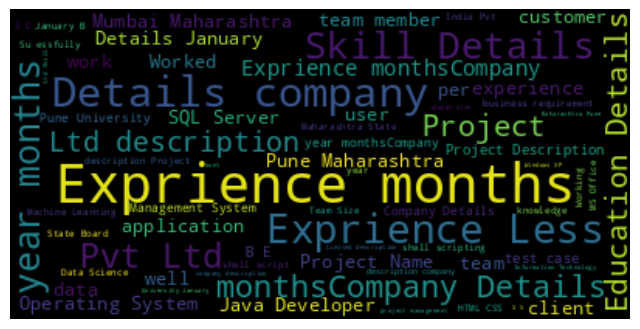

In [ ]:
# Create and generate a word cloud image:
WordCloud= WordCloud().generate(cleanedSentences)
# Display the generated image:
plt.figure(figsize=(8,8))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Building Models

**1.** The train_test_split function of the sklearn.model_selection package in Python **splits arrays or matrices into random subsets for train and test data, respectively.**

**2.TF-IDF (Term Frequency - Inverse Document Frequency) is a handy algorithm that uses the frequency of words to determine how relevant those words are to a given document.**

**3.Python's SciPy provides tools for creating sparse matrices using multiple data structures, as well as tools for converting a dense matrix to a sparse matrix.**

# We have trained and tested the data and now let’s build the models:
**1.**  Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability.

**2. train_test_split is to split and train the data. KNeighborsClassifier is for K nearest neighbor.**

**3. LogisticRegression is the module used to implement logistic regression.**

**4. If the hyperplane classifies the dataset linearly then the algorithm we call it as SVC.**

**5. The algorithm that separates the dataset by non-linear approach then we call it as SVM.**

**6. A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**

**7.GradientBoostingClassifier. Gradient Boosting for classification. This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [ ]:
Text= df2['cleaned_resume'].values
Target= df2['Category'].values

In [ ]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(Text)
WordFeatures= word_vectorizer.transform(Text)

In [ ]:
WordFeatures.shape

(962, 7351)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(721, 7351)
(241, 7351)


In [ ]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define a function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply text cleaning
df['cleaned_resume'] = df['Resume'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Category' is the target variable
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# If you have other categorical features, apply encoding similarly

In [ ]:
X = df['cleaned_resume']
y = df['Category']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the data
X = tfidf.fit_transform(X).toarray()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train models, evaluate performance, and generate classification reports
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {score}')

    # Print the classification report
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}')

    if score > best_score:
        best_score = score
        best_model = model


Logistic Regression Accuracy: 0.9948186528497409
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00

In [ ]:
import joblib

# Assuming `model_gb` is your trained Gradient Boosting model
joblib.dump(GradientBoostingClassifier, 'best_model1.pkl')


['best_model1.pkl']